## I. `python`求微分方程解析解

求微分方程
$$
    \begin{cases}
        \frac{d^2 y}{dx^2} + 2\frac{dy}{dx} + 2y = 0 \\
        y(0) = 0, \quad y^{'} (0) = 1
    \end{cases} 
$$

### sympy.dsolve用法

dsolve(eq, simplify = True, ics = None)

eq: 常微分方程

simplify: 化简

ics: 初值、边值(It should be given in the form of ``{f(x0): x1, f(x).diff(x).subs(x, x2):x3}``)

In [1]:
from sympy import symbols, Function
from sympy import diff, dsolve

# 定义自变量x
x = symbols('x')
# 定义函数y
y = Function('y')
# 定义方程
eq = diff(y(x), x, 2) + 2 * diff(y(x), x, 1) + 2 * y(x)
# 定义初始条件(字典)
con = {y(0): 0, diff(y(x), x).subs(x, 0): 1}
# 求解方程
y = dsolve(eq, ics = con)
# 打印方程
print(y)

Eq(y(x), exp(-x)*sin(x))


$$
    \begin{cases}
        \frac{d^2 y}{dx^2} + 2\frac{dy}{dx} + 2y = sinx \\
        y(0) = 0, \quad y^{'} (0) = 1
    \end{cases} 
$$

In [2]:
from sympy import symbols, Function
from sympy import diff, dsolve, sin

x = symbols('x')
y = Function('y')
eq = diff(y(x), x, 2) + 2 * diff(y(x), x, 1) + 2 * y(x) - sin(x)
con = {y(0): 0, diff(y(x), x).subs(x, 0): 1}
y = dsolve(eq, ics = con)
print(y)

Eq(y(x), (6*sin(x)/5 + 2*cos(x)/5)*exp(-x) + sin(x)/5 - 2*cos(x)/5)


### 微分方程组

$$
    \begin{cases}
        \frac{dx_1}{dt}=2x_1-3x_2+3x_3, \quad x_1(0)=1 \\
        \frac{dx_2}{dt}=4x_1-5x_2+3x_3, \quad x_2(0)=2 \\
        \frac{dx_3}{dt}=4x_1-4x_2+2x_3, \quad x_3(0)=3
    \end{cases}
$$

In [3]:
from sympy import symbols, Function
from sympy import diff, dsolve, Matrix

# 创建变量
t = symbols('t')
x1 = Function('x1')
x2 = Function('x2')
x3 = Function('x3')
# 方程组
x = Matrix([x1(t), x2(t), x3(t)])
A = Matrix([[2, -3, 3], [4, -5, 3], [4, -4, 2]])
eq = diff(x, t) - A * x
# 初值
con = {x1(0): 1, x2(0): 2, x3(0): 3}
# 解方程组
s = dsolve(eq, ics = con)
# 打印解
for i in range(3):
    print(s[i])

Eq(x1(t), 2*exp(2*t) - exp(-t))
Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t))
Eq(x3(t), 2*exp(2*t) + exp(-2*t))


## II. `python`求微分方程数值解

### 基于一阶方程(龙格-库塔方法)，使用`scipy.integrate`模块的`odeint`函数求解

#### odeint函数的用法

y = odeint(func, y0, t)

func: dy/dt

y0: y的初始条件(可以是向量)

t: 求y的时间点序列，初始值点应该是序列的第一个元素

y: 包含t中每个所需时间的y值  array, shape (len(t), len(y0))

#### 求解方程

$$
    \begin{cases}
        \frac{dy}{dx} = -2y + x^2 + 2x \\
        y(1) = 2
    \end{cases}
$$

In [4]:
# 解析解
from sympy import symbols, Function
from sympy import diff, dsolve

x = symbols('x')
y = Function('y')
eq = diff(y(x), x, 1) + 2 * y(x) - x ** 2 - 2 * x
y = dsolve(eq, ics = {y(1): 2})
print(y)

Eq(y(x), ((2*x**2 + 2*x - 1)*exp(2*x)/4 + 5*exp(2)/4)*exp(-2*x))


[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ]
[[ 2.          2.08484933  2.9191691   4.18723381  5.77289452  7.63342241
   9.75309843 12.12613985 14.75041934 17.62515427 20.75005673 24.12502089
  27.7500077  31.62500278 35.75000104 40.1250004  44.75000015 49.62500006
  54.75000002]]


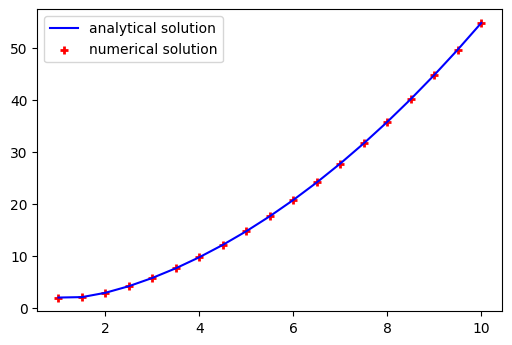

In [5]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# def function
func = lambda y, x: -2 * y + x ** 2 + 2 * x
fun = lambda x: ((2 * x ** 2 + 2 * x - 1) * np.exp(2 * x) / 4 + 5 * np.exp(2) / 4) * np.exp(-2 * x)
# data x
x = np.arange(1, 10.5, 0.5)
# data y
y = odeint(func, 2, x)
# print
print(x)
print(y.T)
# plot
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(111)
ax.scatter(x, y[:, 0], marker = '+', linewidth = 2, color = 'r', label = "numerical solution")
ax.plot(x, fun(x), color = 'b', label = "analytical solution")
ax.legend()
plt.show()

令$ y_1 = y, \quad y_2 = y^{'} $，将二阶微分方程化为一阶微分方程组

$$
    \begin{cases}
        y_1^{'} = y_2 , & \quad y_1(0) = 0 \\
        y_2^{'} = -2y_1 - 2y_2, & \quad y_2(0) = 1
    \end{cases}
$$

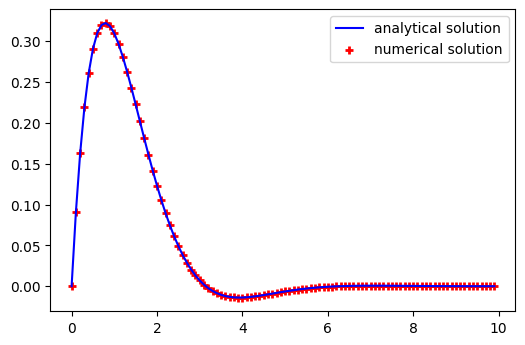

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# def funcation
func = lambda y, x: np.array([y[1], -2 * y[0] - 2 * y[1]])
fun = lambda x: np.exp(-x) * np.sin(x)
# x data
x = np.arange(0, 10, 0.1)
# y data
y0 = np.array([0.0, 1.0])
y = odeint(func, y0, x)
# plot
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(111)
ax.scatter(x, y[:, 0], marker = '+', linewidth = 2, color = 'r', label = "numerical solution")
ax.plot(x, fun(x), color = 'b', label = "analytical solution")
ax.legend()
plt.show()
